# Caching Strategies Exploration
15212-CourseWork-2 from Weicheng Ao

In [1]:
from cache import Memory, CyclicCache, LRUCache, RandomCache
import random
import matplotlib.pyplot as plt

# memcount = 0
# lrucount = 0
# cycliccount = 0
# rdmcount = 0

## Experiments
We use a range of test cases in this main part, in order to show the performance and relationship between the different caching strategies under various conditions.

In [2]:
# We define the main test process here.
def process():
    global memcount,cycliccount,rdmcount,lrucount,results
    mem = Memory()
    lru = LRUCache()
    cyclic = CyclicCache()
    rdm = RandomCache()
    results = []
    for datum in test_data:
        mem.lookup(datum)
    print("Memory memory Hits:", mem.get_hit_count())
    memcount = mem.get_hit_count()
    results.append(memcount)
    
    for datum in test_data:
        lru.lookup(datum)
    print("LRU memory Hits:", lru.get_hit_count())
    lrucount = lru.get_hit_count()
    results.append(lrucount)

    for datum in test_data:
        cyclic.lookup(datum)
    print("Cyclic memory Hits:", cyclic.get_hit_count())
    cycliccount = cyclic.get_hit_count()
    results.append(cycliccount)

    for datum in test_data:
        rdm.lookup(datum)
    print("Random memory Hits:", rdm.get_hit_count())
    rdmcount = rdm.get_hit_count()
    results.append(rdmcount)

<h4>1. Basic Test Cases: Ordered/Unordered Data Points with no duplicate value contained (Every value in the Test Case is unique).</h4>

In [3]:
test_data = []
# Ordered Unique Data Generation, from 0 to 999.
print("Ordered Unique Data Generation")
for i in range(0,1000):
    test_data.append(i)

process()

# Unordered Unique Data Generation, from 0 to 999.
import random
random.shuffle(test_data)

print("Unordered Unique Data Generation")
process()


Ordered Unique Data Generation
Memory memory Hits: 1000
LRU memory Hits: 1000
Cyclic memory Hits: 1000
Random memory Hits: 1000
Unordered Unique Data Generation
Memory memory Hits: 1000
LRU memory Hits: 1000
Cyclic memory Hits: 1000
Random memory Hits: 1000


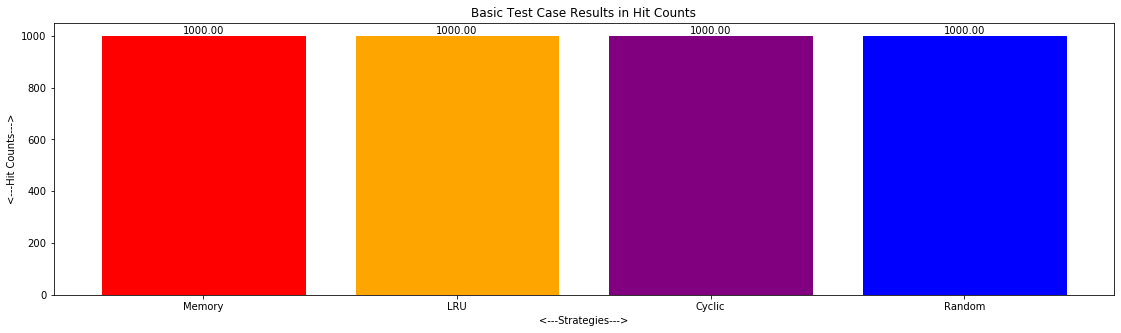

In [4]:
colours = ['red','orange','purple','blue','indigo','gray','green','black','pink']
plt.figure(figsize=(19,5))
plt.xlabel('<---Strategies--->')
plt.ylabel('<---Hit Counts--->')
plt.title('Basic Test Case Results in Hit Counts')
bars = plt.bar(['Memory','LRU','Cyclic','Random'],[memcount,cycliccount,rdmcount,lrucount],label='Hit Counts')
for i in range(4):
    bars[i].set_color(colours[i])
for x,y in zip(['Memory','LRU','Cyclic','Random'],[memcount,cycliccount,rdmcount,lrucount]):
    plt.text(x,y,'%.2f' %y, ha='center',va='bottom')

In [5]:
# Generate Unique Test Data according to the cache size N.
# For example: If N=4, the number of the test data will be 4, and this
#will be repeated 100 times of the same test set of data.
# This time I assumed the cache_size of three implementations same.

mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()

print("Cache Size Assumed:", rdm.cache_size)
test_data = []
temp = lru.cache_size
for i in range(0, lru.cache_size):
    test_data.append(random.randint(temp-lru.cache_size, temp))
    temp = temp + lru.cache_size + 1
print("Unique Data Set Generated:",test_data,"*100")
for i in range(0, 100):
    for j in range(0,temp):
        test_data.append(test_data[j])

import random
random.shuffle(test_data)

process()

Cache Size Assumed: 4
Unique Data Set Generated: [2, 6, 14, 19] *100
Memory memory Hits: 2404
LRU memory Hits: 4
Cyclic memory Hits: 4
Random memory Hits: 4


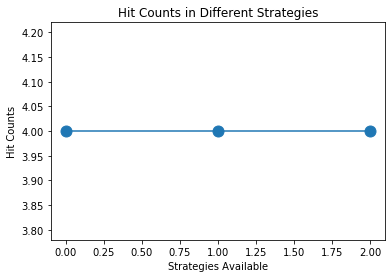

In [6]:
plt.title("Hit Counts in Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Strategies Available')
plt.plot([lrucount,cycliccount,rdmcount], label='Hit Counts', marker='o',markersize='11')


<p>Case Note:</p>
<p>For these Basic Test Cases above, we can see that they have the same times of memory accesses, this is because the data is unique and the number of data points is not exceeded the cache size, so that every data needs to be cached. Once the cached value is found, it needs not to access memory. Hence in these cases they behave in the same way.</p>

<h4>2. The number of unique data points is larger than the cache size.</h4>
<p>For example: if the cache size is 4, then the number of unique data points will be larger than 4.</p>

In [7]:
# Test Data Generation
# We generated 5 unique data points and appended these values 100 times to a list called test_data.
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()
mem_results = []
lru_results = []
cyclic_results = []
rdm_results = []

# I used a range of the number of unique data points, in this case, from 5 to 14 unique values.
for k in range(1,11): 
    print("Cache Size Assumed:", rdm.cache_size)
    test_data = []
    temp = lru.cache_size
    for i in range(0, lru.cache_size + k):
        # This code snippet in this for loop is for generating unique values.
        test_data.append(random.randint(temp-lru.cache_size, temp))
        temp = temp + lru.cache_size + 1
    print("Unique Data Set Generated:",test_data,"*100")
    for i in range(0, 100):
        for j in range(0,temp+k):
            test_data.append(test_data[j])
    process()
    mem_results.append(results[0])
    lru_results.append(results[1])
    cyclic_results.append(results[2])
    rdm_results.append(results[3])
    # print(len(test_data))

Cache Size Assumed: 4
Unique Data Set Generated: [1, 6, 11, 16, 24] *100
Memory memory Hits: 3005
LRU memory Hits: 3005
Cyclic memory Hits: 3005
Random memory Hits: 1197
Cache Size Assumed: 4
Unique Data Set Generated: [0, 5, 10, 15, 24, 29] *100
Memory memory Hits: 3606
LRU memory Hits: 3606
Cyclic memory Hits: 3606
Random memory Hits: 2208
Cache Size Assumed: 4
Unique Data Set Generated: [2, 6, 12, 19, 22, 29, 33] *100
Memory memory Hits: 4207
LRU memory Hits: 4207
Cyclic memory Hits: 4207
Random memory Hits: 3145
Cache Size Assumed: 4
Unique Data Set Generated: [1, 9, 14, 19, 23, 26, 34, 35] *100
Memory memory Hits: 4808
LRU memory Hits: 4808
Cyclic memory Hits: 4808
Random memory Hits: 3986
Cache Size Assumed: 4
Unique Data Set Generated: [1, 5, 14, 19, 21, 25, 33, 38, 41] *100
Memory memory Hits: 5409
LRU memory Hits: 5409
Cyclic memory Hits: 5409
Random memory Hits: 4731
Cache Size Assumed: 4
Unique Data Set Generated: [0, 5, 12, 18, 21, 28, 31, 37, 43, 49] *100
Memory memory Hit

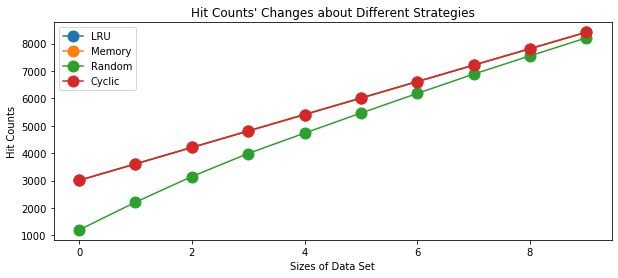

In [8]:
# Graphical Representation of these results above.
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Sizes of Data Set')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
plt.plot(mem_results, label='Memory', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='upper left')

# print(delta_results)

<p>Case Note:</p>
<p>As you can see above, LRU and Cyclic strategies are performed in a same way, as the time of every data point used is only once. For the LRU strategy, it needs to write to cache every time after the fifth value (in the case of the cache size is 4) encountered, but it loses the first value added which also needs memory access if the next value is actually the last value just lost. For the Cyclic strategy, it will be the same as the next value encountered is the last value lost, that is bad in terms of memory accessing.</p>
<p>Interestingly, the Random strategy behaves very well in the first case, it only accessed the memory about one third (1/3) of the other two strategies. I think this is because the order of value accessing which is random accessing, takes a big advantage and is not restricted to the accessing order.</p>
<p>However, when the data set becomes large, the advantage of the Random strategy is reduced sharply first and then gradually diminished as shown in the graph.</p>

<h4>3. New value added just after a cached value used (in LRU case, it is read.) and After this, the Data Points between the second and the new added value are repeated several times.</h4>
<p>For example: if the cache size is 4, then the data set is like [0,1,2,3,0,4,1,2,3,0,4,1,2,3,0,4,...] (the part of repeatition is '1,2,3,0,4' in this case.) or more data points available, I mean that I intentionally repeat the cached value just before a new value comes, this means I want to explore the performances in case that LRU functionality is used, but I do not know the other two yet.</p>

In [9]:
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()
mem_results = []
lru_results = []
cyclic_results = []
rdm_results = []

# I used a range of the number of unique data points, in this case, from 5 to 14 repeated set of values.
print("Cache Size Selected:", rdm.cache_size)

for k in range(1,11):
    test_data = []
    for i in range(0,rdm.cache_size):
        test_data.append(i)
    test_data.append(test_data[0])
    test_data.append(i+1)
    for j in range(1,k):
        for i in range(1,rdm.cache_size+2):
            test_data.append(test_data[i])
    process()
    mem_results.append(results[0])
    lru_results.append(results[1])
    cyclic_results.append(results[2])
    rdm_results.append(results[3])
# print(test_data)

Cache Size Selected: 4
Memory memory Hits: 6
LRU memory Hits: 5
Cyclic memory Hits: 5
Random memory Hits: 5
Memory memory Hits: 11
LRU memory Hits: 10
Cyclic memory Hits: 6
Random memory Hits: 8
Memory memory Hits: 16
LRU memory Hits: 15
Cyclic memory Hits: 10
Random memory Hits: 9
Memory memory Hits: 21
LRU memory Hits: 20
Cyclic memory Hits: 11
Random memory Hits: 14
Memory memory Hits: 26
LRU memory Hits: 25
Cyclic memory Hits: 15
Random memory Hits: 15
Memory memory Hits: 31
LRU memory Hits: 30
Cyclic memory Hits: 16
Random memory Hits: 17
Memory memory Hits: 36
LRU memory Hits: 35
Cyclic memory Hits: 20
Random memory Hits: 15
Memory memory Hits: 41
LRU memory Hits: 40
Cyclic memory Hits: 21
Random memory Hits: 19
Memory memory Hits: 46
LRU memory Hits: 45
Cyclic memory Hits: 25
Random memory Hits: 20
Memory memory Hits: 51
LRU memory Hits: 50
Cyclic memory Hits: 26
Random memory Hits: 22


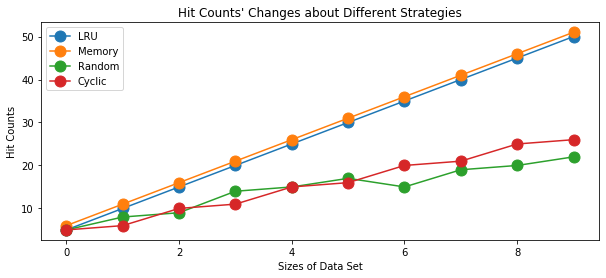

In [10]:
# Graphical Representation of these results above.
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Sizes of Data Set')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
plt.plot(mem_results, label='Memory', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='upper left')

In [14]:
# test_data = [1,2,3,1,5,1,6,7,8,1,9,2,3,1]
mem = Memory()
lru = LRUCache()
cyclic = CyclicCache()
rdm = RandomCache()
mem_results = []
lru_results = []
cyclic_results = []
rdm_results = []
test_data = []

for j in range(0,10):
    for i in range(0,9999):
        test_data.append(random.randint(0, 5))
    process()
    mem_results.append(results[0])
    lru_results.append(results[1])
    cyclic_results.append(results[2])
    rdm_results.append(results[3])

Memory memory Hits: 9999
LRU memory Hits: 3294
Cyclic memory Hits: 3353
Random memory Hits: 3419
Memory memory Hits: 19998
LRU memory Hits: 6650
Cyclic memory Hits: 6715
Random memory Hits: 6613
Memory memory Hits: 29997
LRU memory Hits: 9962
Cyclic memory Hits: 10051
Random memory Hits: 10064
Memory memory Hits: 39996
LRU memory Hits: 13293
Cyclic memory Hits: 13383
Random memory Hits: 13527
Memory memory Hits: 49995
LRU memory Hits: 16681
Cyclic memory Hits: 16679
Random memory Hits: 16724
Memory memory Hits: 59994
LRU memory Hits: 20022
Cyclic memory Hits: 19934
Random memory Hits: 20072
Memory memory Hits: 69993
LRU memory Hits: 23361
Cyclic memory Hits: 23325
Random memory Hits: 23458
Memory memory Hits: 79992
LRU memory Hits: 26708
Cyclic memory Hits: 26664
Random memory Hits: 26625
Memory memory Hits: 89991
LRU memory Hits: 30066
Cyclic memory Hits: 29992
Random memory Hits: 30059
Memory memory Hits: 99990
LRU memory Hits: 33516
Cyclic memory Hits: 33406
Random memory Hits: 3345

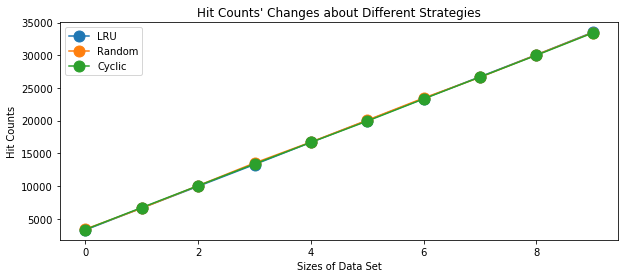

In [15]:
# Graphical Representation of these results above.
plt.figure('Trends', figsize=(10,4))
plt.title("Hit Counts' Changes about Different Strategies")
plt.ylabel('Hit Counts')
plt.xlabel('Sizes of Data Set')
plt.plot(lru_results, label='LRU', marker='o',markersize='11')
# plt.plot(mem_results, label='Memory', marker='o',markersize='11')
plt.plot(rdm_results, label='Random', marker='o',markersize='11')
plt.plot(cyclic_results, label='Cyclic', marker='o',markersize='11')
plt.legend(loc='upper left')

## Conclusions
Both implementations seem to be doing the same thing.